In [226]:
# import pandas
import pandas as pd

In [227]:
# pd.date_range('01/01/2023','31/12/2023',freq='MS')
stocks = pd.read_csv('../6. Time Series Analyze/AAPL.csv')
# Drop Columns
stocks = stocks.drop(columns=['Volume','Adj Close'],axis=1)

stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date', inplace=True)

stocks.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [228]:
# Only Friday from the date range
fridays = pd.date_range('01/01/2020','12/31/2020', freq='W-FRI')
stocks.reindex(fridays).head(3)

,Open,High,Low,Close
2020-01-03,74.287498,75.144997,74.1250,74.357498
2020-01-10,77.650002,78.167503,77.0625,77.582497
2020-01-17,79.067497,79.684998,78.7500,79.682503


<Axes: >

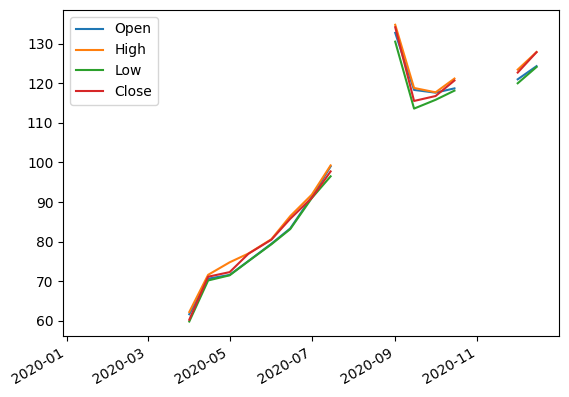

In [229]:
# Reindexing only for Semi Month (Bi Weekly)
fortnight = pd.date_range('01/01/2020' ,'12/31/2020',freq='SMS-15')
stocks.reindex(fortnight).head()
stocks.reindex(fortnight).plot()


<Axes: >

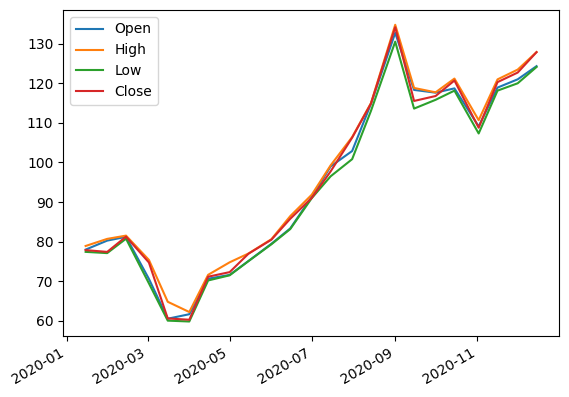

In [230]:
# User Defined Function to improve the datetime index
import datetime as dt

thisYear = pd.date_range('01/01/2020','12/31/2020',freq="SMS")
# Function

def adjustDate(date):
    if date.weekday() < 5 :
        return date
    elif date.weekday() == 5 :
        return date - dt.timedelta(days=1)
        return
    else:
        return date + dt.timedelta(days=1)
    
Chart = thisYear.to_series().apply(adjustDate)
stocks.reindex(Chart).plot()
    




#### Resampling - > Upsampling | Downsampling

In [231]:
# import file
fires = pd.read_pickle('../Phase - 3/fires_cleaned.pkl')
fires = fires.set_index('discovery_date')
fires.drop(columns=['fire_name','fire_year','state','contain_date'],inplace=True)
fires.head(3)

,acres_burned
discovery_date,
2004-10-06,16823.0
2004-10-13,7700.0
2004-07-20,10.0


In [232]:
fires.resample(rule='ME').sum().head(4)

,acres_burned
discovery_date,
1992-01-31,26779.35
1992-02-29,73605.86
1992-03-31,115644.53
1992-04-30,83030.67


In [237]:
fires.resample(rule='QE',label='right',closed='right').sum().head(4)


,acres_burned
discovery_date,
1992-03-31,216029.74
1992-06-30,485118.67
1992-09-30,1293714.71
1992-12-31,129026.79


<Axes: xlabel='discovery_date'>

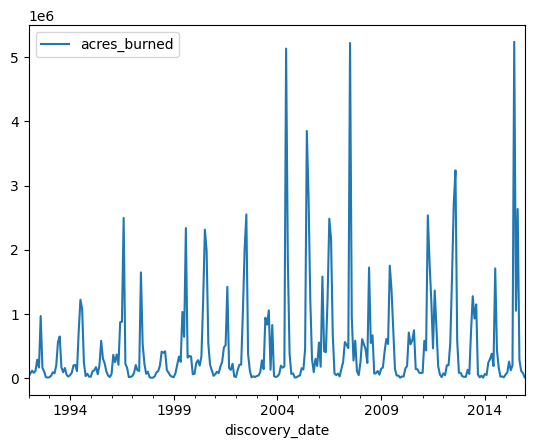

In [235]:
fires.resample(rule='ME').sum().plot()